# Linear Regression

Author: Athan Zhang (athanzxyt)

*In this notebook:*
- Statistical Linear Regression
- Ordinary Least Squares
- Gradient Descent Linear Regression

Linear Regression is a supervised learning algorithm used to predict a continuous outcome variable (the dependent variable) based on one or more predictor variables (independent variables). It is commonly used in statistics and machine learning. It works by finding the best-fitting straight line through the data points. This line is then used to make predictions about new data.

The equation for the best-fitting line is represented as:

$$
y_{\text{predicted}} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n}
$$

Where $y$ is the outcome variable and $x_{1},x_{2},...,x_{n}$ are the predictors/features. The coefficients for the predictor variables are chosen such taht the line fits the data points as well as possible. This is done by minimizing the residuals, which is differences between the predicted values and actual values. We will use least-squared error for this.

$$
\text{LSE} = \frac{1}{n}\sum_{i=1}^{n}\left(y_{\text{actual}} - y_{\text{predicted}}\right)^{2}
$$

#### Important Assumptions of Linear Regression

1. Normality

It is required all the variables to be multivariate normal, with its residuals normally distributed. This type of assumption can be best chekced with the help of a histogram or a Q-Q Plot.

2. Independence

It is required that there is little to no autocorrelation in the data. This is when the predictor variables are not independent of each other. We can check of this with a scatter plot and we can also test a model for autocorrelation with the Durbin-Watson test.

3. Homoscedasticity

It is required that the residuals have constant variance

## Simple Linear Regression

Simple Linear Regression is the statistical method of developing a model with a single predictor variable.

In [ ]:
class linreg_stats():
    
    def __init__(self):
        pass
    
    

## Linear Regression using Gradient Descent

We can rewrite our line of best-fit to be more readable for gradient descent as such:

$$
\begin{align}
    \widehat{y_{i}} &= \begin{bmatrix} w_{i,1} & w_{i,2} & w_{i,3} & \dots & w_{i,n} \end{bmatrix}\begin{bmatrix}x_{i,1} \\ x_{i,2} \\ x_{i,3} \\ \vdots \\ x_{i,n} \end{bmatrix} + b_{i} \\
&= \bf{w}^{\top}\bf{x} + b_{i}
\end{align}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

SEED = 1234
np.random.seed(SEED)

## Dataset Creation

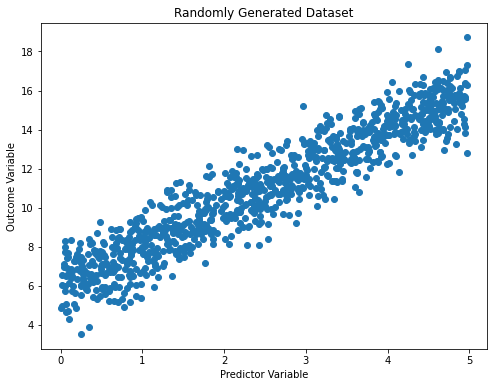

In [11]:
# Create a dataset
X = 5 * np.random.rand(1000, 1)
y = 2 * X + np.random.randn(1000, 1) + 6

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Randomly Generated Dataset")
plt.xlabel("Predictor Variable")
plt.ylabel("Outcome Variable")
plt.show()

In [14]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=SEED)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (800, 1)
Shape y_train: (800, 1)
Shape X_test: (200, 1)
Shape y_test: (200, 1)


In [ ]:
class linreg_grad():
    
    def __init__(self):
        self.betas = None
        self.alpha = None
    
    def fit(self, X, y, learning_rate=0.05, n_iters=1000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        
        costs = []
        for i in range(n_iters):
            y_hat = np.dot(X, self.weights) + self.bias
            
            cost = np.sum((y - y_hat)**2) / n_samples
            costs.append(cost)
            print(f"Iteration {i} Cost: {round(cost,6)}")
            
            dJ_db = (-2 / n_samples) * (np.dot(X.T, (y - y_hat)))
            dJ_dw = (-2 / n_samples) * (np.sum(X))
            
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db
            
        return
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
            
         
        